[Reference: theoretical ecology / A simple Metropolis-Hastings MCMC in R](https://theoreticalecology.wordpress.com/2010/09/17/metropolis-hastings-mcmc-in-r/)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import scipy as sp
import numpy.random as npr
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = 4.5, 3.2

# Create Data Set

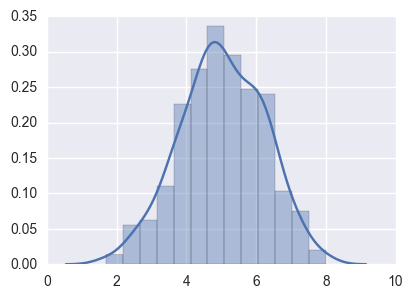

In [4]:
trueMean = 5 ; trueSD = 1.2 ; sample_size = 300
data = np.random.normal(loc=trueMean, scale=trueSD, size=sample_size)
sns.distplot(data, hist=True, kde=True)

# Define Statistical Model

In [5]:
priorMeanMean = 0 ; priorMeanSD = 10000
priorSDMean = 0 ; priorSDSD = 10000

In [6]:
def likelihood(param):
    mean = param[0][0]
    sd = np.exp(param[0][1])
    
    loglikelihood = -(sample_size / 2) * np.log(np.power(sd,2)) - (1 / (2 * np.power(sd,2))) * (np.power( (data-mean),2 )).sum()
    logprior = -(1/2)*np.log(np.power(priorMeanSD, 2)) - ( (np.power((priorMeanMean),2))   / (2 * np.power(priorMeanSD,2)))+\
    -(1/2)*np.log(np.power(priorMeanSD, 2)) - ( (np.power((np.exp(priorSDMean)),2))   / (2 * np.power(priorSDSD,2)))  
    
    logsum = loglikelihood + logprior
    
    return logsum

# Define Next

次に移動した点での $P^*(X)$　に相当するものを考える。<br>
京大の資料に従って、一つずつパラメータを動かす

In [7]:
def next_param(param, param_index):
    mean_next = param[0][0] ; sd_next = param[0][1] 
    
    if param_index == 0:
        mean_next = param[0][0] + npr.normal(0,0.1)
    elif param_index == 1:
        sd_next = param[0][1] + npr.normal(0,0.1)

        
    return np.array([[mean_next, sd_next]])

# MCMC

In [8]:
num_sampling = 3000
chain = np.zeros((num_sampling, 1, 2))
chain[0][0][0] = 7 # starting value for mean
chain[0][0][1] = np.log(5) # starting value for sd

num_accepted = 0
for i in range(num_sampling-1):
    chain_previous = chain[i][:]
    chain_new = np.zeros((1, 1, 2))
    
    for p in range(2):
        proposal = next_param(chain_previous, p)
        
        probab = likelihood(proposal) - likelihood(chain_previous)
        u = np.log(npr.uniform(0, 1))
        if u < probab:
            chain_new[0][0][p] = proposal[0][p].copy()
            num_accepted += 1
        else:
            chain_new[0][0][p] = chain[i][0][p].copy()
            
    chain[i+1] = chain_new[0][:]

In [9]:
round(num_accepted / (num_sampling * 2), 3) 

0.525

# Show Results

In [10]:
show_num = int(np.rint(num_sampling * 0.9))

## mean

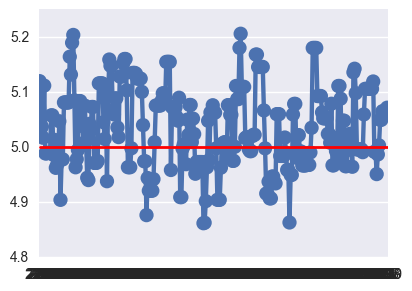

In [11]:
sns.pointplot(x=np.arange(show_num, num_sampling, 1), y=chain[show_num: , 0, 0])
plt.plot([0, num_sampling-show_num], [trueMean, trueMean], linewidth=2, color='red')

In [12]:
chain[show_num: , 0, 0].mean()

5.0359894502354665

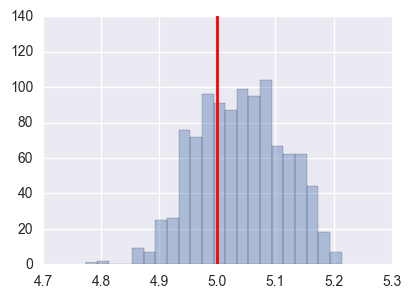

In [13]:
sns.distplot(chain[int(num_sampling * 0.65): , 0, 0], hist=True, kde=False)
plt.plot([trueMean, trueMean], [0, 140], linewidth=2, color='red')

## sd

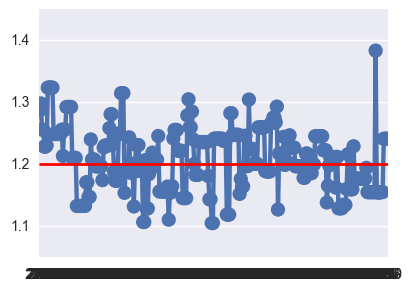

In [14]:
sns.pointplot(x=np.arange(show_num, num_sampling, 1), y=np.exp(chain[show_num: , 0, 1]))
plt.plot([0, num_sampling-show_num], [trueSD, trueSD], linewidth=2, color='red')

In [15]:
np.exp(chain[show_num: , 0, 1].mean())

1.2076373763599801

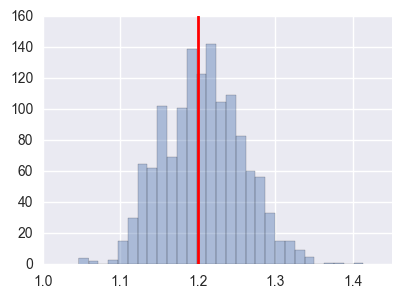

In [16]:
sns.distplot(np.exp(chain[int(num_sampling * 0.55): , 0, 1]), hist=True, kde=False)
plt.plot([trueSD, trueSD], [0, 160], linewidth=2, color='red')